## <span style="color:blue">  Laboratorio di Simulazione Numerica - Esercitazione 09</span>

In questa esercitazione ho scritto un codice per risolvere il **Traveling Salesman Problem** con un **algoritmo genetico**. 

Il problema del commesso viaggiatore consiste nel determinare quale sia il percorso più breve che unisce un particolare insieme di punti. Il vincolo che il commesso viaggiatore deve rispettare è quello di passare esattamente una volta in ogni città, tornando poi al punto di partenza. La soluzione può ovviamente variare in base a cosa si intende per "breve". Da un punto di vista matematico l'affermazione si traduce nella definizione della funzione che, considerato un percorso, ne restituisce il costo. Per questo problema io ho considerato le distanze al quadrato:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

dove $\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N$ è una sequenza ordinata delle città.

Il problema viene risolto implementando un algoritmo genetico che funziona schematicamente nel seguente modo:

 - Si genera un insieme di individui (percorsi), detto popolazione, e si ordina mettendo ai primi posti i percorsi che restituiscono un costo minore.
 - Utlizzando un operatore di selezione, si estraggono coppie di individui che si mescoleranno tra loro (crossover) e muteranno individualmente (permutazione, shift, inversione), in    modo da creare una nuova popolazione. La selezione avviene secondo un criterio "Darwinista", ovvero prediligendo gli individui più "prestanti" secondo la formula: $j=int(M \times r^p)$, con $r$ numero random in $[0, 1)$ e $p$ parametro opportuno.
 - Salva la nuova generazione e riparti dal punto 1.
 
Con queste indicazioni ogni permutazione ciclica rappresenterebbe lo stesso percorso. Per evitare questa situazione facciamo in modo che la città con indice "$1$" sia sempre la città di partenza. In questo modo la degenerazione è ridotta a 2 e contempla solo il percorso attraversato in senso orario oppure antiorario.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import scipy.stats

/home/andrea/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_1 = pd.read_csv("Esercizio_09_1/Es09_01.csv", sep=',')
data_2 = pd.read_csv("Esercizio_09_2/Es09_02.csv", sep=',')

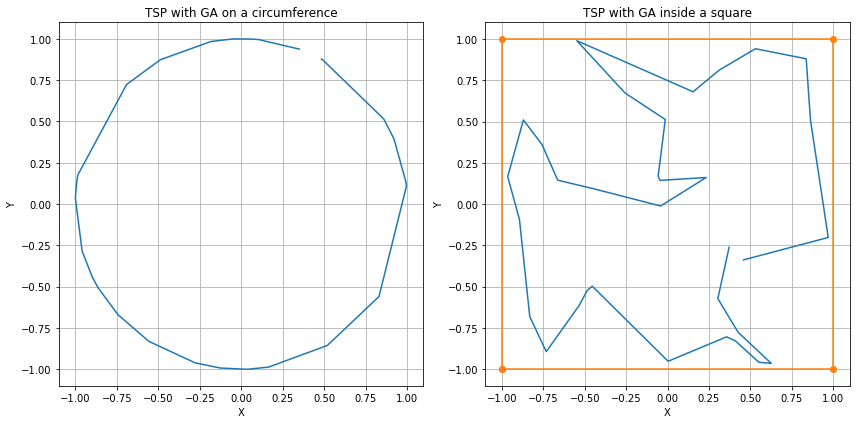

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(data_1['X'],data_1['Y'])
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('TSP with GA on a circumference')
axs[0].grid(True)

axs[1].plot(data_2['X'],data_2['Y'])
square_vertices = [ [-1, -1], [-1, 1], [1, 1], [1, -1], [-1, -1] ]
x, y = zip(*square_vertices)
axs[1].plot(x, y, marker='o')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title('TSP with GA inside a square')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In questi plot ho rappresentato il miglior cammino del commesso viaggiatore in coordinate cartesiane dopo aver applicato il mio codice per ottimizzare il cammino in due situazioni differenti; Per fare il plot di sinistra ho generato casualmente $34$ città su una circonferenza, mentre per fare il plot di destra ho generato casualmente $34$ città all'interno di un quadrato. Il miglior cammino trovato in entrambi i casi pare essere quello ottimale: i segmenti che collegano le diverse città non si intersecano l'un l'altro.

In [4]:
loss_best_1 = pd.read_csv("Esercizio_09_1/Es09_Loss_Best.csv", sep=',')
loss_best_2 = pd.read_csv("Esercizio_09_2/Es09_Loss_Best.csv", sep=',')

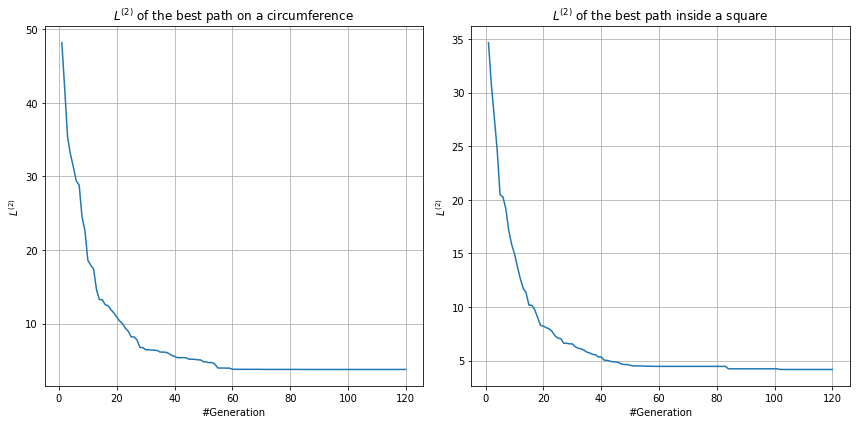

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(loss_best_1['Generazione'],loss_best_1['BestLoss'])
axs[0].set_xlabel('#Generation')
axs[0].set_ylabel('$L^{(2)}$')
axs[0].set_title('$L^{(2)}$ of the best path on a circumference')
axs[0].grid(True)

axs[1].plot(loss_best_2['Generazione'],loss_best_2['BestLoss'])
axs[1].set_xlabel('#Generation')
axs[1].set_ylabel('$L^{(2)}$')
axs[1].set_title('$L^{(2)}$ of the best path inside a square')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In questo plot ho rappresentato l'andamento della lunghezza $L^{(2)}$ del miglior cammino, in funzione del numero delle generazioni dell'algoritmo, su una circonferenza (a sinistra) e all'interno di un quadrato (a destra). Utilizzando una popolazione iniziale composta da $900$ individui, è possibile osservare che l'andamento di $L^{(2)}$ si stabilizza rispettivamente dopo circa $60$ (a sinistra) e $85$ (a destra) generazioni. Per questo motivo ho iterato l'algoritmo genetico per $120$ generazioni, in modo tale che la lunghezza $L^{(2)}$ totale del cammino avesse tempo di stabilizzarsi sul valore minimo.

In [6]:
loss_half_1 = pd.read_csv("Esercizio_09_1/Es09_Loss_Half.csv", sep=',')
loss_half_2 = pd.read_csv("Esercizio_09_2/Es09_Loss_Half.csv", sep=',')

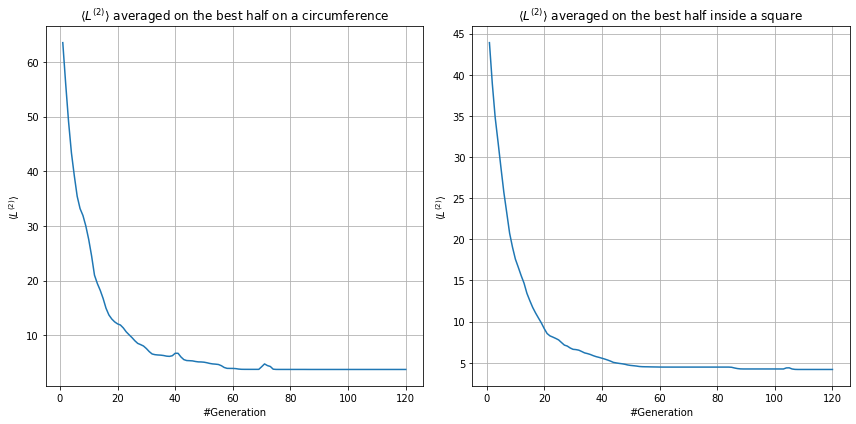

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(loss_half_1['Generazione'],loss_half_1['HalfLoss'])
axs[0].set_xlabel('#Generation')
axs[0].set_ylabel(r'$\langle L^{(2)}\rangle$')
axs[0].set_title(r'$\langle L^{(2)}\rangle$ averaged on the best half on a circumference')
axs[0].grid(True)

axs[1].plot(loss_half_2['Generazione'],loss_half_2['HalfLoss'])
axs[1].set_xlabel('#Generation')
axs[1].set_ylabel(r'$\langle L^{(2)}\rangle$')
axs[1].set_title(r'$\langle L^{(2)}\rangle$ averaged on the best half inside a square')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In questo plot ho rappresentato l'andamento della lunghezza $\langle L^{(2)}\rangle$ mediata sulla migliore metà della popolazione, in funzione del numero delle generazioni dell'algoritmo, su una circonferenza (a sinistra) e all'interno di un quadrato (a destra). E' possibile osservare che, in entrambi i casi, dopo un numero adeguato di generazioni (circa $80$ a sinistra e $110$ a destra) l'andamento si stabilizza al valore di lunghezza del miglior cammino; questo è dovuto al fatto che la popolazione converge verso la migliore soluzione trovata: la diminuzione della variabilità genetica e l'equilibrio tra esplorazione e sfruttamento fanno sì che ulteriori generazioni non portino a miglioramenti significativi, stabilizzando così $\langle L^{(2)}\rangle$ al valore del miglior cammino.